In [64]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import json
from pprint import pprint
import pandas as pd
from shapely.geometry import Polygon
import shapely
%matplotlib widget

$$
\frac{d}{dt}N  = \frac{1}{C_0}N^2
$$

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
C0 = 186*10**9
T0 = 2007.0
k = 1.0
t_vec = np.linspace(-1000, 2000,1000) 
y_vec = C0/(T0-t_vec)/10.0**9
ax.plot(t_vec,y_vec)
ax.set_ylabel('N,млрд')
print('')

$$
u_t = \alpha u^2 + (D_x u_x)_x + (D_y u_y)_y
$$
$$
\alpha > 0
$$
$$
D_x(u) > 0
$$
$$
D_y(u) > 0
$$

$$
D_x(u) = Cu^{\sigma},\sigma>0 
$$

$$
D_y(u) = Cu^{\sigma},\sigma>0
$$


$$
u_t = F(u) + (D_x u_x)_x + (D_y u_y)_y
$$
1. 
$$
F(u)>0,D_x(u) > 0, D_y(u) > 0
$$

2. 
$$
F(u) \in \mathbb{R},D_x(u) > 0, D_y(u) > 0
$$


https://www.mathnet.ru/links/004f2a382388798323d98247ed81fe3a/zvmmf4669.pdf

В отсутствие диффузионных слагаемых получим гиперболический рост  
$$
u_t = \alpha u^2 , \alpha > 0
$$

$$
u(t) = \frac{1}{\frac{1}{u(t_0)}-\alpha (t-t_0)}
$$

$$
T_0 = \frac{1}{\alpha} \frac{1}{u(t_0)}+t_0
$$
$$
u(t) = \frac{1}{\alpha} \frac{1}{T_0-t}
$$

Опорные параметры
$$
T_0 =2007
$$
$$
\frac{1}{\alpha} = 186 \cdot 10^9
$$



метод баланса для 
$$
u_t = \alpha u^2 + (D_x u_x)_x + (D_y u_y)_y
$$
стр 134

квазилинейная схема 
$$
u_t = \alpha u^2 + (k_1(t,x,y,u) u_x)_x + (k_2(t,x,y,u) u_y)_y
$$
стр 140


<Axes: >

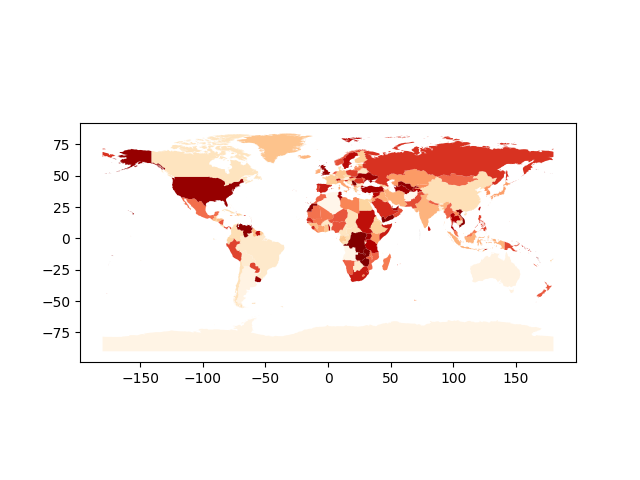

In [46]:
world_pop = gpd.read_file('./data/pop.geo.json')
world_pop['POP2005']=world_pop['POP2005'].astype(float)
world_pop['area']=  world_pop.to_crs(6933).area.astype(float)*0.000001
world_pop['density'] = (world_pop['POP2005'].div(world_pop['area']))
world_pop.head()

# Create population density map
plt.title('World Population Density Map')
world_pop.plot(cmap='OrRd',linewidth=0.2,legend=True)

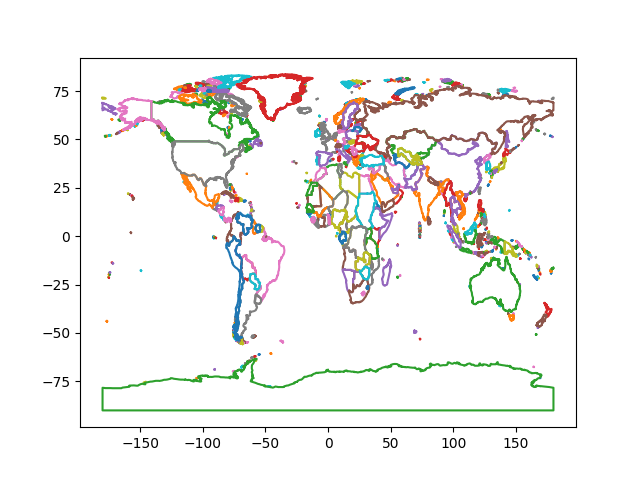

In [87]:
fig,ax = plt.subplots()
for i in range(len(world_pop)):
    try:
        xx, yy = world_pop.iloc[i]['geometry'].exterior.coords.xy
        xx = xx.tolist()
        yy = yy.tolist()
        ax.plot(xx,yy)
    except:
        geoms_ = world_pop.iloc[i]['geometry'].geoms
        for j in range(len(geoms_)):
            xx, yy = geoms_[j].exterior.coords.xy
            xx = xx.tolist()
            yy = yy.tolist()
            ax.plot(xx,yy)

# simple solver

https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/